In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read data

In [8]:
df = pd.read_csv('../../../Data/Real Estate/Real Estate Data.csv', index_col=0, header=0)
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      1404 non-null   object 
 1   Zoning Class              1404 non-null   object 
 2   Lot Frontage              1151 non-null   float64
 3   Lot Area                  1404 non-null   int64  
 4   Alley                     84 non-null     object 
 5   Lot Shape                 1404 non-null   object 
 6   Land Contour              1404 non-null   object 
 7   Lot Config                1404 non-null   object 
 8   Land Slope                1404 non-null   object 
 9   Nbhd                      1404 non-null   object 
 10  Location Condition        1404 non-null   object 
 11  Bldg Type                 1404 non-null   object 
 12  House Style               1404 non-null   object 
 13  OvQual                    1404 non-null   int64  
 14  Overall 

,Type,Zoning Class,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,OvQual,Overall Cond,Built,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Basement Finished Area,Basement Unfinished Area,Basement Area,Heating Qual,CentralAir,Electrical,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Garage Yr Built,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price
0,2-STORY 1946 & NEWER,Resid Low Density,65.0,8450,NaN,Regular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2003,2003,Gable,Composite Shingle,Vinyl Siding,Brick Face,196.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,No Exposure,Good Living Quarters,706,150,856,Excellent,Y,Standard Circuit Breakers & Romex,856,854,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,No Fireplace,Attached to home,2003.0,Rough Finished,2,548,Average,Average,Paved,0,61,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,208500
1,1-STORY 1946 & NEWER,Resid Low Density,80.0,9600,NaN,Regular,Level,Frontage on 2 sides,Gentle,Veenker,Adjacent Feeder St,1-family Detached,1 story,6,8,1976,1976,Gable,Composite Shingle,Metal Siding,NaN,0.0,Average,Average,Cinder Block,"Good (90-99"")",Average,Good Exposure,Avg Living Quarters,978,284,1262,Excellent,Y,Standard Circuit Breakers & Romex,1262,0,1262,0,1,2,0,3,1,Average,6,Typical Functionality,1,Average,Attached to home,1976.0,Rough Finished,2,460,Average,Average,Paved,298,0,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,181500
2,2-STORY 1946 & NEWER,Resid Low Density,68.0,11250,NaN,Slightly irregular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2001,2002,Gable,Composite Shingle,Vinyl Siding,Brick Face,162.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Min Exposure,Good Living Quarters,486,434,920,Excellent,Y,Standard Circuit Breakers & Romex,920,866,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Average,Attached to home,2001.0,Rough Finished,2,608,Average,Average,Paved,0,42,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,223500
3,2-STORY 1945 & OLDER,Resid Low Density,60.0,9550,NaN,Slightly irregular,Level,Corner lot,Gentle,Crawford,Normal,1-family Detached,2 story,7,5,1915,1970,Gable,Composite Shingle,Wood Siding,NaN,0.0,Average,Average,Brick & Tile,"Typical (80-89"")",Good,No Exposure,Avg Living Quarters,216,540,756,Good,Y,Standard Circuit Breakers & Romex,961,756,1717,1,0,1,0,3,1,Good,7,Typical Functionality,1,Good,Detached from home,1998.0,Unfinished,3,642,Average,Average,Paved,0,35,272,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,"Abnormal Sale - trade, foreclosure, short sale",140000
4,2-STORY 1946 & NEWER,Resid Low Density,84.0,14260,NaN,Slightly irregular,Level,Frontage on 2 sides,Gentle,Northridge,Normal,1-family Detached,2 story,8,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,Brick Face,350.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Avg Exposure,Good Living Quarters,655,490,1145,Excellent,Y,Standard Circuit Breakers & Romex,1145,1053,2198,1,0,2,1,4,1,Good,9,Typical Functionality,1,Average,Attached to home,2000.0,Rough Finished,3,836,Average,Average,Paved,192,84,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,250000


### Rename columns

In [9]:
df = df.rename(columns = {'OvQual':'Overall Qual',
                          'Built':'Year',
                          'Garage Yr Built':'Year Garage'})

df.columns.sort_values()

Index(['1st Floor Area', '2nd Floor Area', '3 Season Porch Area', 'Alley',
       'Basement Area', 'Basement Cond', 'Basement Exposure',
       'Basement Finish', 'Basement Finished Area', 'Basement Full Baths',
       'Basement Half baths', 'Basement Height', 'Basement Unfinished Area',
       'Bedrooms Above Grade', 'Bldg Type', 'CentralAir', 'Electrical',
       'Enclosed Porch Area', 'Exterior Cond', 'Exterior Primary',
       'Exterior Qual', 'Fence', 'Fireplaces', 'Fireplce Qual', 'Foundation',
       'Full Baths Above Grade', 'Functionality', 'Garage Area', 'Garage Cars',
       'Garage Cond', 'Garage Finish', 'Garage Qual', 'Garage Type',
       'Half Baths Above Grade', 'Heating Qual', 'House Style', 'Kitchen Qual',
       'Kitchens Above Grade', 'Land Contour', 'Land Slope',
       'Living Area Above Grade', 'Location Condition', 'Lot Area',
       'Lot Config', 'Lot Frontage', 'Lot Shape', 'Masonry/Veneer',
       'Masonry/Veneer Area', 'Nbhd', 'Open Porch Area', 'Overall Co

### Check nans

In [10]:
df.isna().sum(axis=0).sort_values(ascending=False)

Alley                       1320
Masonry/Veneer               824
Lot Frontage                 253
Year Garage                   63
Masonry/Veneer Area            8
Total Rooms Above Grade        0
Garage Type                    0
Fireplce Qual                  0
Fireplaces                     0
Functionality                  0
Type                           0
Kitchen Qual                   0
Garage Finish                  0
Bedrooms Above Grade           0
Half Baths Above Grade         0
Full Baths Above Grade         0
Basement Half baths            0
Basement Full Baths            0
Kitchens Above Grade           0
Garage Cars                    0
2nd Floor Area                 0
Garage Area                    0
Garage Qual                    0
Garage Cond                    0
Paved Drive                    0
Wood Deck Area                 0
Open Porch Area                0
Enclosed Porch Area            0
3 Season Porch Area            0
Screen Porch Area              0
Pool Area 

### Drop Alley column

In [12]:
df = df.drop(columns=['Alley'])

### Drop rows with ANY nans

In [120]:
df.dropna(how='any', axis=0).shape

(410, 68)

### Drop columns with ANY nans

In [121]:
df.dropna(how='any', axis=1).shape

(1404, 63)

# Examine object columns

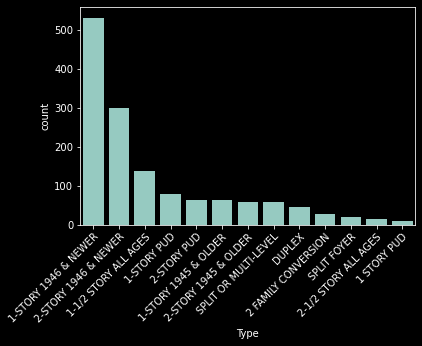

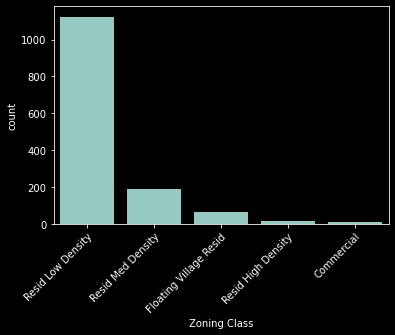

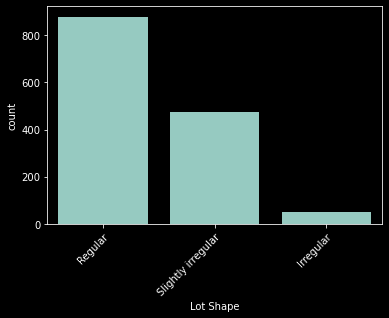

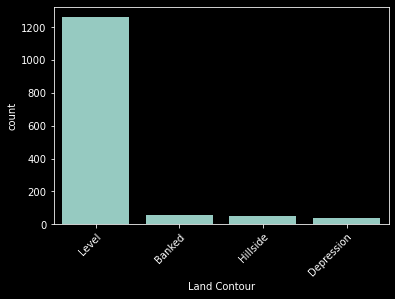

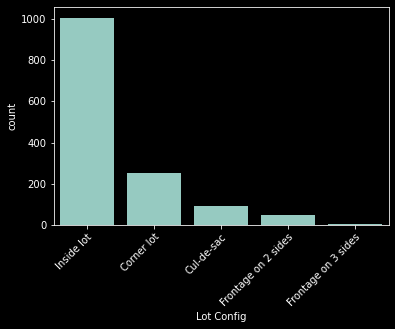

In [13]:
obj_cols = df.select_dtypes(include=object).columns

df2 = df.fillna('nan')

for c in obj_cols[:5]:
    sns.countplot(df2, x=c, order=df2[c].value_counts().index)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    plt.show()
# end

# Examine numerical columns

### Create histograms

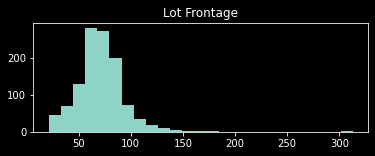

nulls:  253


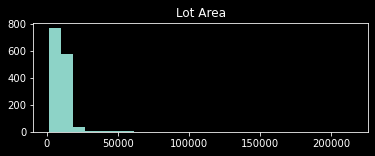

nulls:  0


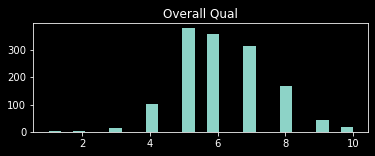

nulls:  0


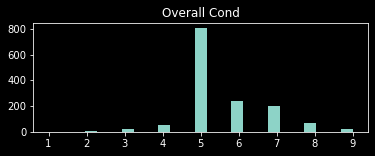

nulls:  0


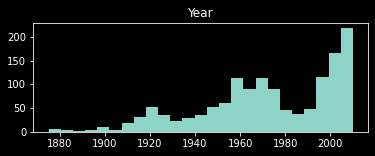

nulls:  0


In [14]:
num_cols = df.select_dtypes(exclude=object).columns

for c in num_cols[:5]:
    ax = df[c].hist(bins=25, figsize=(6,2))
    ax.set_title(c)
    ax.grid(False)
    plt.show()
    print( 'nulls: ', df[c].isna().sum() )
# end

### Plot numeric columns vs. Sale Price

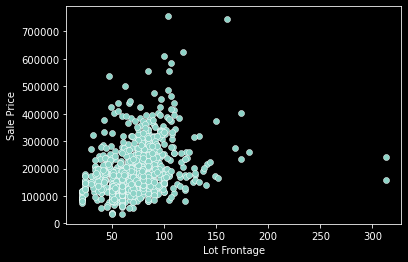

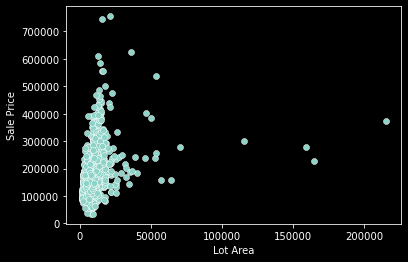

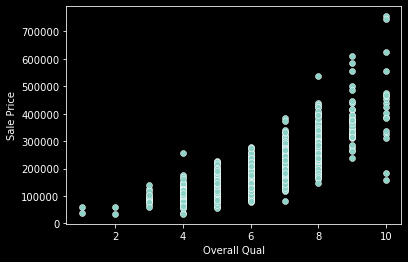

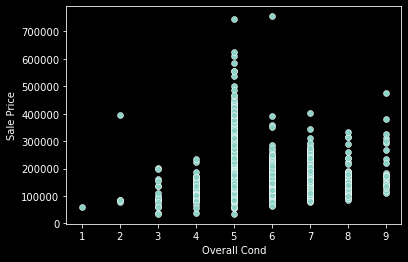

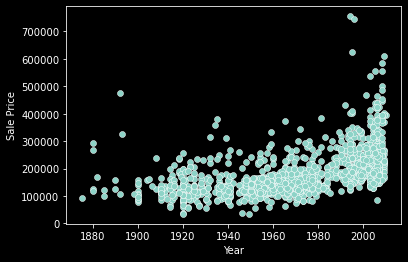

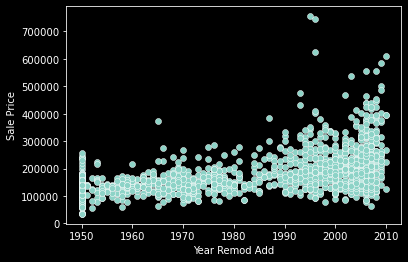

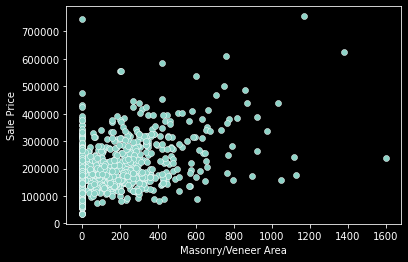

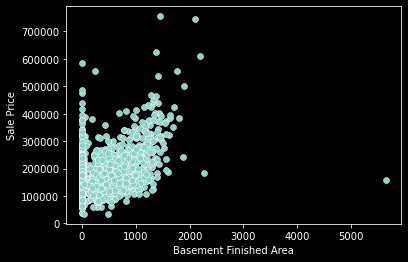

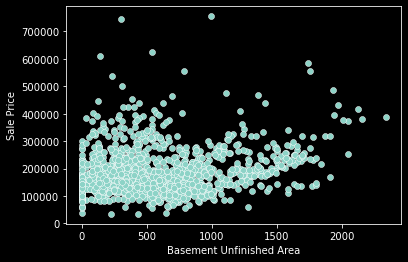

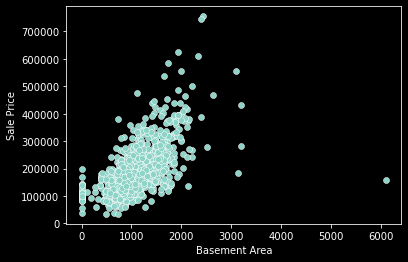

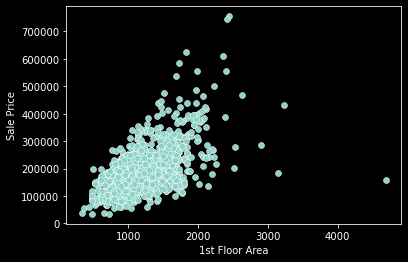

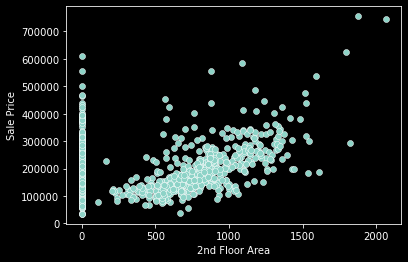

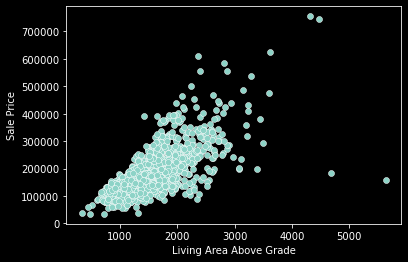

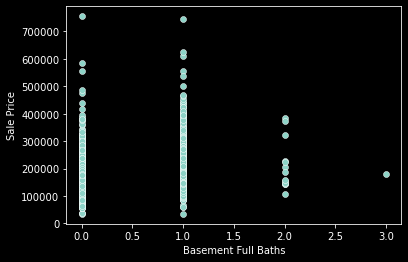

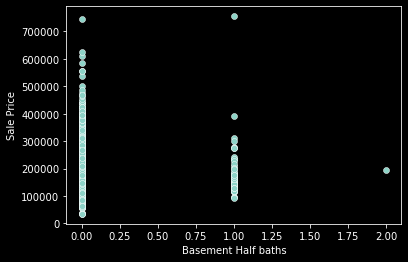

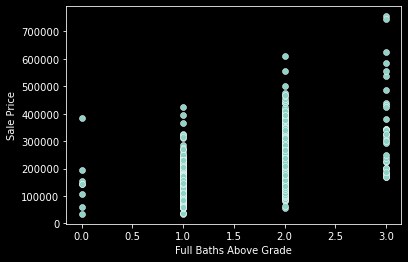

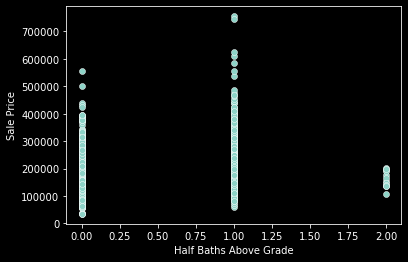

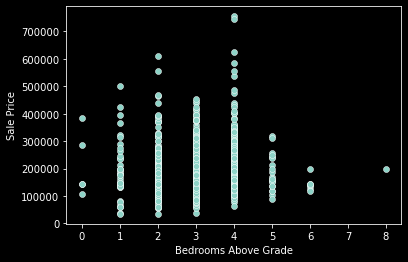

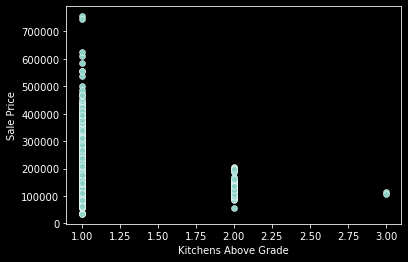

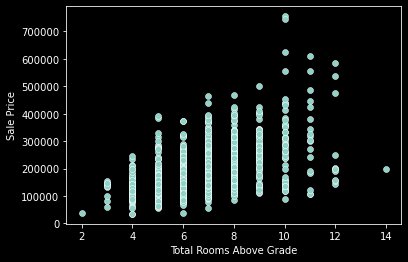

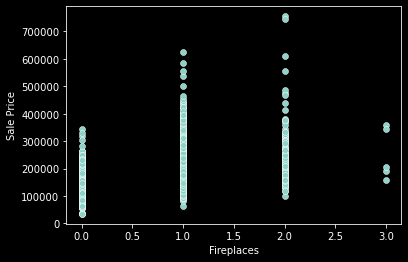

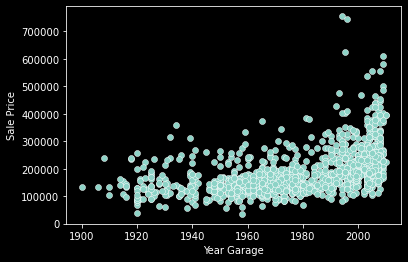

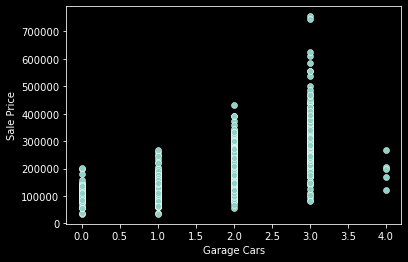

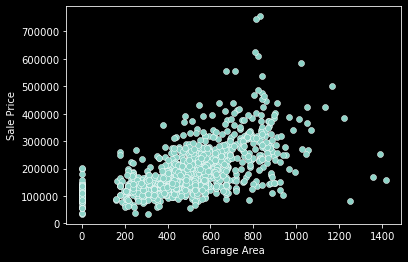

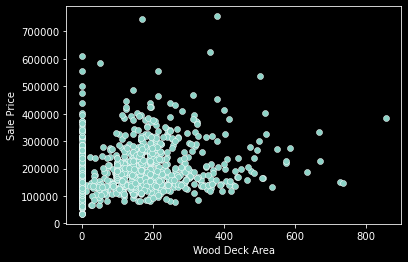

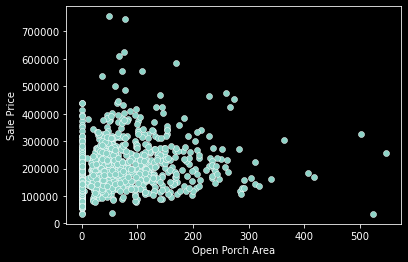

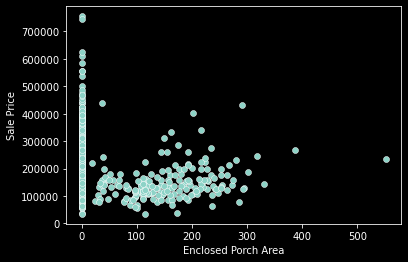

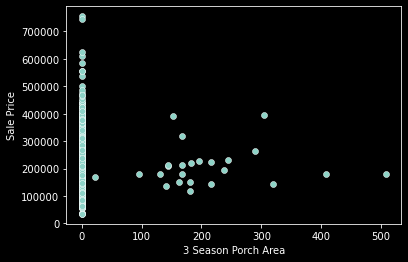

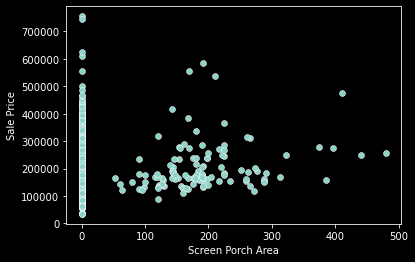

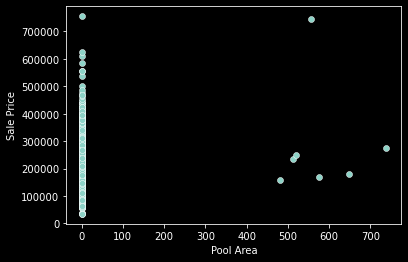

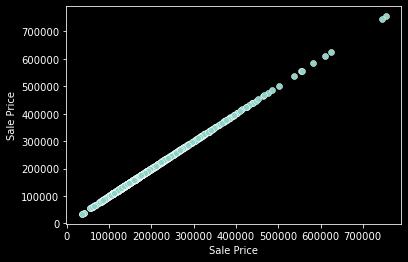

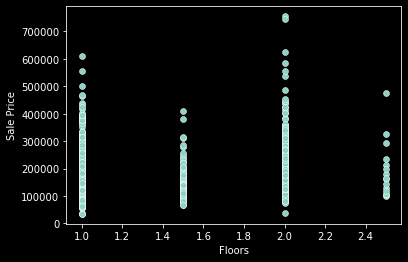

In [130]:
num_cols = df.select_dtypes(exclude=object).columns

for c in num_cols:
    plt.show()
    sns.scatterplot(
        data = df,
        x = c,
        y = 'Sale Price'
    )

### Pearson correlation between numeric features

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year,Year Remod Add,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,Basement Area,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Total Rooms Above Grade,Fireplaces,Year Garage,Garage Cars,Garage Area,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Price,Floors
Lot Frontage,1.000000,0.420662,0.236922,-0.055504,0.114264,0.083574,0.184033,0.239505,0.112015,0.383307,0.450615,0.066824,0.392226,0.116309,-0.002541,0.188437,0.033147,0.248060,-0.010508,0.337931,0.249356,0.060695,0.269344,0.331991,0.076183,0.143371,0.012055,0.068701,0.034056,0.210265,0.340649,-0.026886
Lot Area,0.420662,1.000000,0.094077,-0.004968,0.005404,0.007797,0.098177,0.211278,-0.009278,0.253925,0.292018,0.043907,0.254422,0.161735,0.046917,0.122175,0.002791,0.111620,-0.016430,0.181382,0.264487,-0.030022,0.143250,0.169270,0.165651,0.078540,-0.016836,0.019107,0.039344,0.077235,0.255624,-0.006804
Overall Qual,0.236922,0.094077,1.000000,-0.115542,0.584242,0.551553,0.411621,0.229589,0.301121,0.524104,0.467556,0.284777,0.583782,0.112081,-0.047875,0.557985,0.260531,0.070990,-0.175487,0.418802,0.387806,0.555026,0.598544,0.553909,0.228405,0.301543,-0.123002,0.027283,0.058286,0.064725,0.789793,0.229804
Overall Cond,-0.055504,-0.004968,-0.115542,1.000000,-0.405203,0.064198,-0.134115,-0.053732,-0.149114,-0.192484,-0.150836,0.026353,-0.087537,-0.056376,0.121982,-0.203203,-0.069091,0.017025,-0.084364,-0.056345,-0.030435,-0.343556,-0.208116,-0.173462,-0.005998,-0.037968,0.080784,0.025307,0.053261,-0.002648,-0.096052,0.013892
Year,0.114264,0.005404,0.584242,-0.405203,1.000000,0.593398,0.310382,0.233522,0.160280,0.387986,0.270713,0.003930,0.188433,0.173424,-0.045567,0.470165,0.230815,-0.088822,-0.180027,0.084088,0.135634,0.823744,0.536167,0.470821,0.209276,0.185279,-0.385163,0.028539,-0.058660,0.002878,0.514077,0.009329
Year Remod Add,0.083574,0.007797,0.551553,0.064198,0.593398,1.000000,0.175019,0.111367,0.185428,0.277309,0.231252,0.131417,0.277843,0.109974,-0.016361,0.441806,0.172455,-0.067895,-0.141517,0.185497,0.105967,0.638142,0.414756,0.359099,0.194032,0.219090,-0.190029,0.043230,-0.043921,0.003897,0.500613,0.105280
Masonry/Veneer Area,0.184033,0.098177,0.411621,-0.134115,0.310382,0.175019,1.000000,0.261952,0.114443,0.362329,0.337071,0.172204,0.388181,0.086161,0.013562,0.271695,0.196522,0.091758,-0.035357,0.275791,0.240958,0.249915,0.360315,0.368511,0.154239,0.118314,-0.108247,0.017051,0.051242,0.010697,0.475175,0.108202
Basement Finished Area,0.239505,0.211278,0.229589,-0.053732,0.233522,0.111367,0.261952,1.000000,-0.504758,0.518700,0.442355,-0.149722,0.197412,0.647788,0.063086,0.047649,-0.010766,-0.127064,-0.078019,0.031715,0.256096,0.138171,0.218749,0.293111,0.189279,0.108242,-0.096128,0.024474,0.060501,0.141162,0.374826,-0.181503
Basement Unfinished Area,0.112015,-0.009278,0.301121,-0.149114,0.160280,0.185428,0.114443,-0.504758,1.000000,0.409002,0.319110,-0.001390,0.237957,-0.425186,-0.094860,0.299694,-0.046948,0.159867,0.043306,0.250805,0.039984,0.206405,0.211995,0.177549,-0.007664,0.128603,-0.011173,0.019714,-0.015084,-0.036468,0.211756,-0.068414
Basement Area,0.383307,0.253925,0.524104,-0.192484,0.387986,0.277309,0.362329,0.518700,0.409002,1.000000,0.825036,-0.197803,0.443786,0.307646,-0.003641,0.324725,-0.073028,0.023952,-0.052344,0.275369,0.326323,0.322948,0.429962,0.480404,0.216984,0.240616,-0.098058,0.034433,0.079921,0.126973,0.604809,-0.305849


<AxesSubplot:>

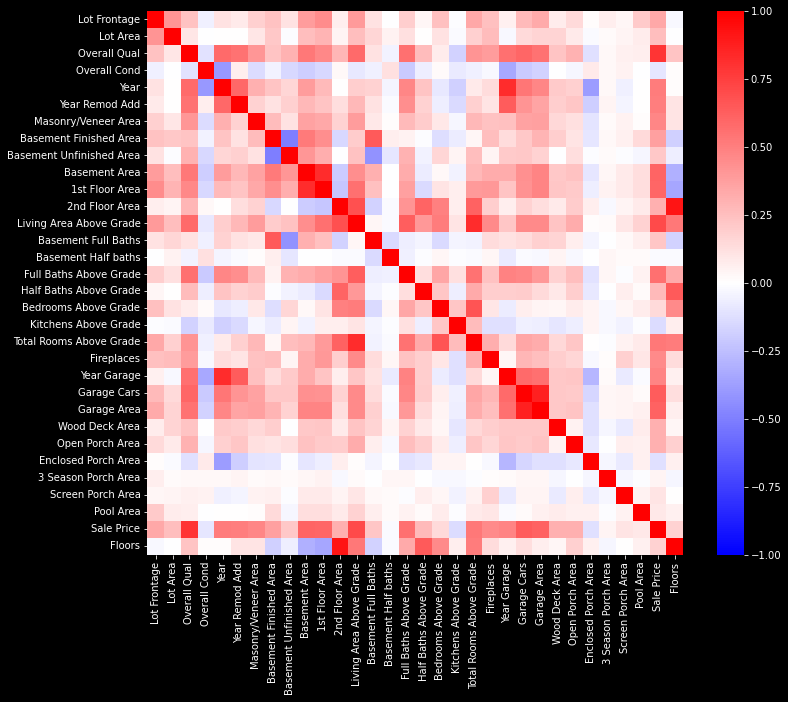

In [128]:
corr = df.select_dtypes(exclude=object).corr()
display(corr)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    cmap='bwr'
)

# Examining the Type column

Type
1-STORY 1946 & NEWER    531
2-STORY 1946 & NEWER    298
1-1/2 STORY ALL AGES    138
1-STORY PUD              87
2-STORY PUD              63
1-STORY 1945 & OLDER     62
2-STORY 1945 & OLDER     59
SPLIT OR MULTI-LEVEL     57
DUPLEX                   46
2-FAMILY CONVERSION      28
SPLIT FOYER              20
2-1/2 STORY ALL AGES     15
Name: count, dtype: int64

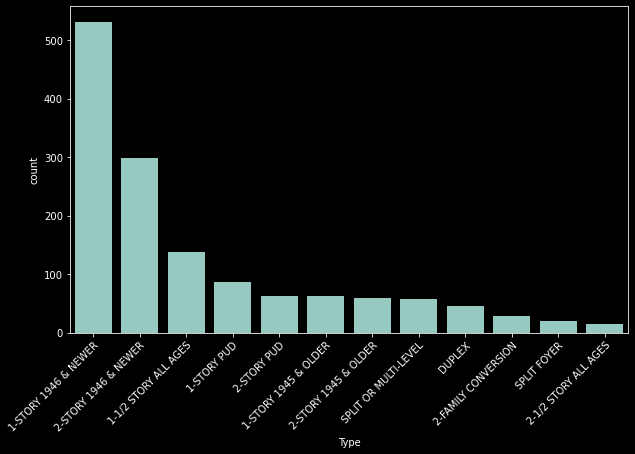

In [93]:
vc = df.Type.value_counts()
display(vc)

plt.figure(figsize=(10,6))
sns.countplot(df, x="Type", order=vc.index);
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

### Replace errant values

In [16]:
df.Type = df.Type.replace(
    {'1 STORY PUD':'1-STORY PUD',
     '2 FAMILY CONVERSION':'2-FAMILY CONVERSION'}
)

df.Type.value_counts()

Type
1-STORY 1946 & NEWER    531
2-STORY 1946 & NEWER    298
1-1/2 STORY ALL AGES    138
1-STORY PUD              87
2-STORY PUD              63
1-STORY 1945 & OLDER     62
2-STORY 1945 & OLDER     59
SPLIT OR MULTI-LEVEL     57
DUPLEX                   46
2-FAMILY CONVERSION      28
SPLIT FOYER              20
2-1/2 STORY ALL AGES     15
Name: count, dtype: int64

### Compare Type and Lot Shape

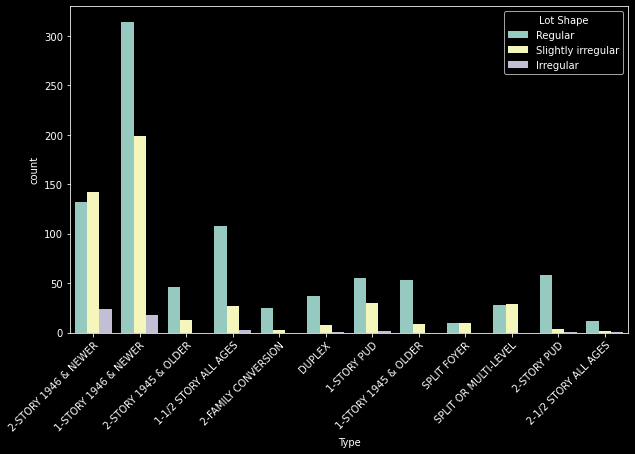

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(df, x="Type", hue="Lot Shape");
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

### Compare prices of 1-story and 2-story homes

In [17]:
df[ df.Type.str.startswith('1-STORY') ]['Sale Price'].median()

157900.0

In [18]:
df[ df.Type.str.startswith('2-STORY') ]['Sale Price'].median()

194500.0

### Compare prices of old and new houses

In [19]:
df[ df.Type.str.contains('OLDER') ]['Sale Price'].median()

118400.0

In [20]:
df[ df.Type.str.contains('NEWER') ]['Sale Price'].median()

185500.0

### Compare old, 1-story vs new, 2-story

In [23]:
df[ df.Type.str.startswith('1-STORY') & df.Type.str.contains('OLDER') ]['Sale Price'].median()

100000.0

In [24]:
df[ df.Type.str.startswith('2-STORY') & df.Type.str.contains('NEWER') ]['Sale Price'].median()

215600.0

### Using .apply() to create a 'Floors' column

In [82]:
def get_floors(x):
    if type(x) == str:
        if '1-STORY' in x:
            return 1
        elif '1-1/2 STORY' in x:
            return 1.5
        elif '2-STORY' in x:
            return 2
        elif '2-1/2 STORY' in x:
            return 2.5
        # end
    # end
    
    return np.nan
# end

df['Floors'] = df.Type.apply(get_floors)

In [83]:
df[['Type','Floors']].sample(5)

,Type,Floors
375,2-STORY 1946 & NEWER,2.0
1225,1-STORY 1946 & NEWER,1.0
677,1-STORY PUD,1.0
811,1-1/2 STORY ALL AGES,1.5
884,2-STORY 1946 & NEWER,2.0


# Examining the Nbhd column

In [25]:
vc = df.Nbhd.value_counts()
display(vc)

plt.figure(figsize=(10,6))
sns.countplot(df, x="Nbhd", order=vc.index);
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

Nbhd
North Ames                    216
College Creek                 150
Old Town                      103
Edwards                        89
Somerset                       86
Gilbert                        79
Northridge Heights             77
Sawyer                         74
Northwest Ames                 73
Sawyer West                    58
Crawford                       50
Brookside                      49
Mitchell                       48
Northridge                     41
Timberland                     36
Iowa DOT and Rail Road         34
Clear Creek                    27
Stone Brook                    25
South & West of Iowa State     24
Briardale                      16
Veenker                        11
Bloomington Hts                11
Meadow Village                 10
Northpark Villa                 9
Bloomington Heights             6
Bluestem                        2
Name: count, dtype: int64

### Replace errant values

Nbhd
North Ames                    216
College Creek                 150
Old Town                      103
Edwards                        89
Somerset                       86
Gilbert                        79
Northridge Heights             77
Sawyer                         74
Northwest Ames                 73
Sawyer West                    58
Crawford                       50
Brookside                      49
Mitchell                       48
Northridge                     41
Timberland                     36
Iowa DOT and Rail Road         34
Clear Creek                    27
Stone Brook                    25
South & West of Iowa State     24
Bloomington Hts                17
Briardale                      16
Veenker                        11
Meadow Village                 10
Northpark Villa                 9
Bluestem                        2
Name: count, dtype: int64

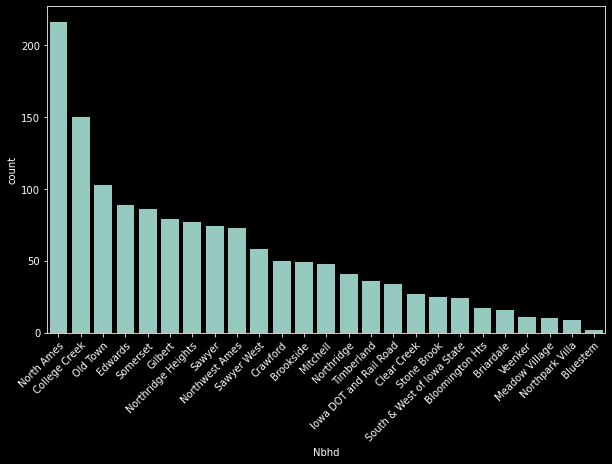

In [91]:
df.Nbhd = df.Nbhd.replace(
    {'Bloomington Heights':'Bloomington Hts'}
)

df.Nbhd.value_counts()

### Compare Sale Price of 3 most populous to 3 least populous

In [39]:
most_pop = vc.index[:3]

df[ df.Nbhd.isin(most_pop) ]['Sale Price'].median()

145000.0

In [40]:
least_pop = vc.index[:-3]

df[ df.Nbhd.isin(least_pop) ]['Sale Price'].median()

167500.0

### Get median prices for each neighborhod

In [51]:
gb = df.groupby(["Nbhd"])['Sale Price'].median().sort_values(ascending=False)
gb

Nbhd
Northridge Heights            315000.0
Northridge                    301500.0
Stone Brook                   278000.0
Timberland                    233975.0
Somerset                      225500.0
Veenker                       218000.0
Crawford                      208812.0
Clear Creek                   200000.0
College Creek                 197200.0
Bloomington Hts               191000.0
Northwest Ames                182900.0
Gilbert                       181000.0
Sawyer West                   179950.0
Mitchell                      154750.0
Northpark Villa               146000.0
North Ames                    141000.0
South & West of Iowa State    139750.0
Bluestem                      137500.0
Sawyer                        135000.0
Brookside                     128000.0
Edwards                       120000.0
Old Town                      119900.0
Meadow Village                106000.0
Briardale                     106000.0
Iowa DOT and Rail Road        104750.0
Name: Sale Price, dt

<AxesSubplot:xlabel='Sale Price', ylabel='Nbhd'>

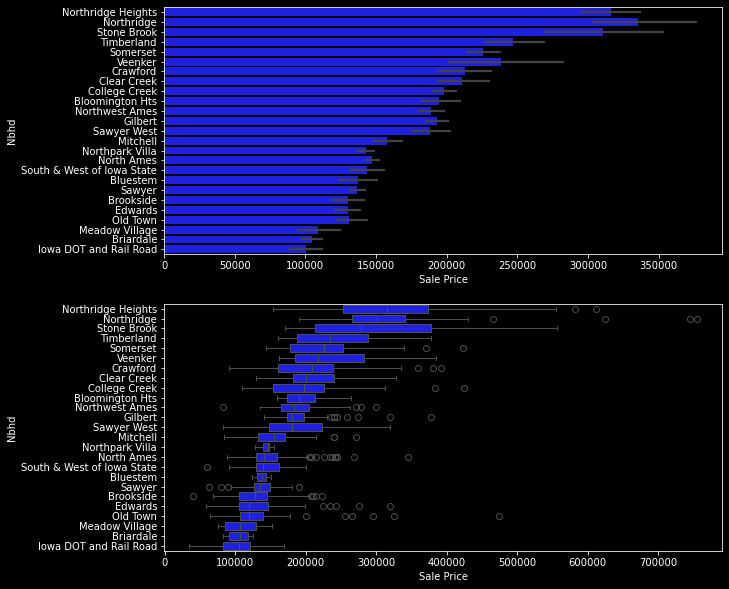

In [52]:
idx = gb.index

plt.figure(figsize=(10,10))

plt.subplot(211)
sns.barplot( data=df, x="Sale Price", y="Nbhd", color='b', order=idx )

plt.subplot(212)
sns.boxplot( data=df, x="Sale Price", y="Nbhd", color='b', order=idx )

### Plot median price vs. count

<AxesSubplot:xlabel='count', ylabel='Sale Price'>

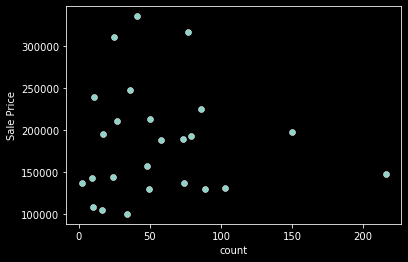

In [44]:
vc = df.Nbhd.value_counts().sort_index()
gb = df.groupby(["Nbhd"])['Sale Price'].mean().sort_index()

sns.scatterplot( x=vc, y=gb )

### Describe each neighborhood

In [54]:
df.groupby(["Nbhd"])['Sale Price'].describe().sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
Nbhd,,,,,,,,
Bluestem,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.00,151000.0
Northpark Villa,9.0,142694.444444,9377.314529,127500.0,140000.00,146000.0,148500.00,155000.0
Meadow Village,10.0,108580.000000,26215.042332,75000.0,85750.00,106000.0,129175.00,151400.0
Veenker,11.0,238772.727273,72369.317959,162500.0,184250.00,218000.0,282000.00,385000.0
Briardale,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.00,125000.0
Bloomington Hts,17.0,194870.882353,30393.229219,159895.0,174000.00,191000.0,213490.00,264561.0
South & West of Iowa State,24.0,143741.000000,32803.175159,60000.0,129500.00,139750.0,162250.00,200000.0
Stone Brook,25.0,310499.000000,112969.676640,170000.0,213500.00,278000.0,377426.00,556581.0
Clear Creek,27.0,210808.592593,50304.163091,130000.0,182500.00,200000.0,240750.00,328000.0


### Pivot Nbhd and Type

In [62]:
pt = df.pivot_table(index='Nbhd', columns='Type', values='Sale Price', aggfunc='median')
pt

Type,1-1/2 STORY ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER,1-STORY PUD,2-1/2 STORY ALL AGES,2-FAMILY CONVERSION,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD,DUPLEX,SPLIT FOYER,SPLIT OR MULTI-LEVEL
Nbhd,,,,,,,,,,,,
Bloomington Hts,NaN,NaN,159895.0,191500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bluestem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137500.0,NaN,NaN,NaN
Briardale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106000.0,NaN,NaN,NaN
Brookside,132500.0,89000.0,77900.0,NaN,214500.0,123500.0,160537.5,NaN,NaN,NaN,NaN,NaN
Clear Creek,212750.0,NaN,238250.0,181500.0,NaN,NaN,244400.0,200000.0,NaN,NaN,NaN,155000.0
College Creek,NaN,NaN,194500.0,143500.0,NaN,NaN,NaN,213500.0,NaN,NaN,133900.0,147000.0
Crawford,189950.0,128625.0,223000.0,275000.0,164000.0,157000.0,200100.0,NaN,NaN,145000.0,NaN,NaN
Edwards,116500.0,84000.0,128250.0,NaN,NaN,125000.0,108000.0,162700.0,130000.0,118500.0,168000.0,151000.0
Gilbert,164000.0,NaN,178492.5,NaN,NaN,145000.0,NaN,183750.0,NaN,NaN,NaN,170000.0


In [63]:
pt = df.pivot_table(index='Nbhd', columns='Type', aggfunc='count', fill_value=0)
pt['Total'] = pt.sum(axis=1)
pt.loc['Total'] = pt.sum(axis=0)
pt

1st Floor Area                        
Type                       1-1/2 STORY ALL AGES 1-STORY 1945 & OLDER   
Nbhd                                                                   
Bloomington Hts                               0                    0  \
Bluestem                                      0                    0   
Briardale                                     0                    0   
Brookside                                    25                   13   
Clear Creek                                   6                    0   
College Creek                                 0                    0   
Crawford                                      9                    4   
Edwards                                      16                   12   
Gilbert                                       1                    0   
Iowa DOT and Rail Road                       14                   10   
Meadow Village                                0                    0   
Mitchell                                      3                    0   
North Ames                                   15                    0   
Northpark Villa                               0                    0   
Northridge                                    2                    0   
Northridge Heights                            0                    0   
Northwest Ames                                1                    0   
Old Town                                     30                   19   
Sawyer                                        3                    2   
Sawyer West                                   1                    0   
Somerset                                      0                    0   
South & West of Iowa State                   11                    2   
Stone Brook                                   0                    0   
Timberland                                    1                    0   
Veenker                                       0                    0   
Total                                       138                   62   

                                                              
Type                       1-STORY 1946 & NEWER 1-STORY PUD   
Nbhd                                                          
Bloomington Hts                               1          16  \
Bluestem                                      0           0   
Briardale                                     0           0   
Brookside                                     2           0   
Clear Creek                                   8           2   
College Creek                                81          10   
Crawford                                     11           3   
Edwards                                      36           0   
Gilbert                                      10           0   
Iowa DOT and Rail Road                        2           0   
Meadow Village                                0           2   
Mitchell                                     22           4   
North Ames                                  144           2   
Northpark Villa                               0           4   
Northridge                                    6           0   
Northridge Heights                           32          19   
Northwest Ames                               33           0   
Old Town                                     10           0   
Sawyer                                       47           0   
Sawyer West                                  19           6   
Somerset                                     32           5   
South & West of Iowa State                    0           0   
Stone Brook                                   7          11   
Timberland                                   23           0   
Veenker                                       5           3   
Total                                       531          87   

                                                                      
Type                       2-1/2 STORY ALL AG

### Achieve the same with crosstab

Type,1-1/2 STORY ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER,1-STORY PUD,2-1/2 STORY ALL AGES,2-FAMILY CONVERSION,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD,DUPLEX,SPLIT FOYER,SPLIT OR MULTI-LEVEL
Nbhd,,,,,,,,,,,,
Bloomington Hts,0,0,1,16,0,0,0,0,0,0,0,0
Bluestem,0,0,0,0,0,0,0,0,2,0,0,0
Briardale,0,0,0,0,0,0,0,0,16,0,0,0
Brookside,25,13,2,0,1,2,6,0,0,0,0,0
Clear Creek,6,0,8,2,0,0,1,7,0,0,0,3
College Creek,0,0,81,10,0,0,0,53,0,0,3,3
Crawford,9,4,11,3,1,1,19,0,0,2,0,0
Edwards,16,12,36,0,0,3,3,4,4,5,2,4
Gilbert,1,0,10,0,0,1,0,60,0,0,0,7


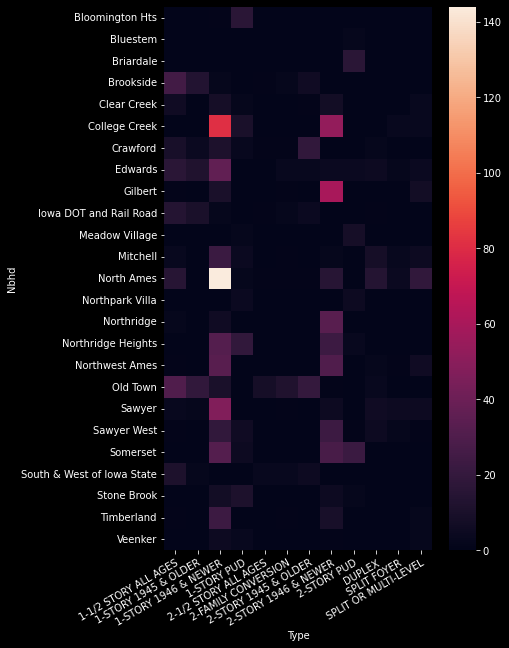

In [72]:
ct = pd.crosstab( df.Nbhd, df.Type )
display(ct)

plt.figure(figsize=(6,10))

sns.heatmap(ct)

plt.gca().set_xticklabels(
    plt.gca().get_xticklabels(),
    rotation=30,
    ha='right',
    rotation_mode='anchor'
)

plt.show()

# Examine Sale Price column

<AxesSubplot:xlabel='Sale Price', ylabel='Density'>

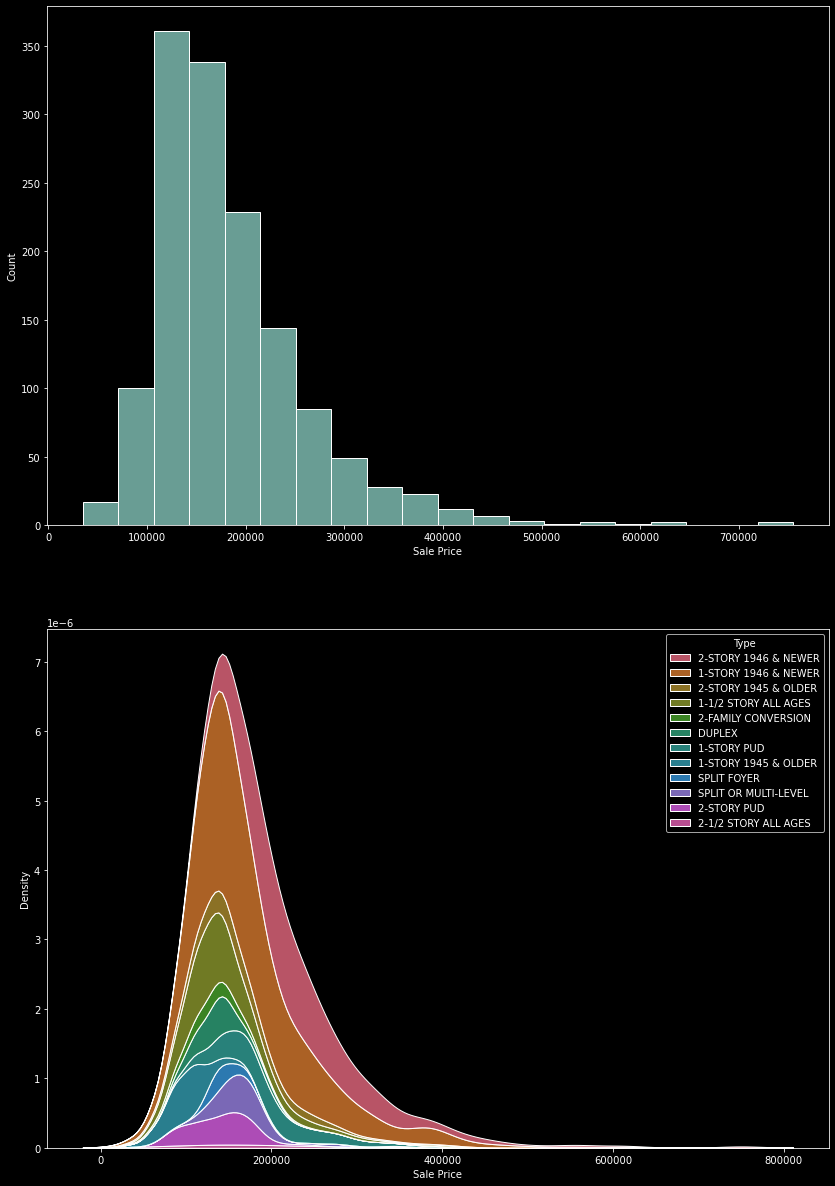

In [116]:
plt.figure(figsize=(14,21))

plt.subplot(211)
sns.histplot(
    data=df,
    x='Sale Price',
    bins=20,
    kde=False
)

plt.subplot(212)
sns.kdeplot(
    data=df,
    x='Sale Price',
    hue='Type',
    multiple="stack",
    fill=True
)

# Examine Lot Frontage column

<AxesSubplot:>

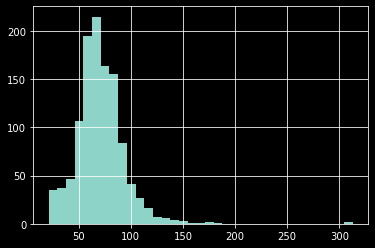

In [84]:
df['Lot Frontage'].hist(bins=35)

### Fill nans in Lot Frontage column

<AxesSubplot:>

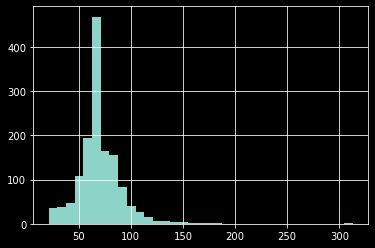

In [85]:
df['Lot Frontage'].fillna( df['Lot Frontage'].median() ).hist(bins=35)

In [87]:
gb = df.groupby(["Nbhd"])['Lot Frontage'].median().sort_values()
gb

Nbhd
Briardale                     21.0
Bluestem                      24.0
Northpark Villa               24.0
Meadow Village                38.5
Bloomington Hts               43.0
Brookside                     52.0
South & West of Iowa State    60.0
Iowa DOT and Rail Road        60.0
Old Town                      60.0
Stone Brook                   61.5
Gilbert                       65.0
Sawyer West                   67.0
Edwards                       67.0
Veenker                       68.0
College Creek                 70.0
Sawyer                        71.0
Somerset                      73.5
North Ames                    74.0
Crawford                      74.5
Mitchell                      75.0
Northwest Ames                80.0
Clear Creek                   80.0
Timberland                    85.0
Northridge Heights            88.5
Northridge                    91.0
Name: Lot Frontage, dtype: float64

<AxesSubplot:>

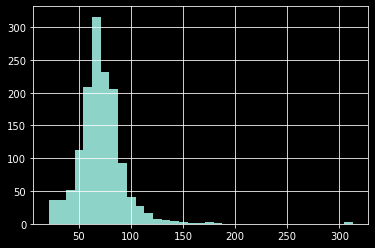

In [88]:
def fill(r):
    n = r.Nbhd
    
    L = r['Lot Frontage']
    
    if pd.isna(L):
        return gb[n]
    else:
        return L
    # end
# end

df.apply(fill, axis=1).hist(bins=35)

### Average lot area of houses from neighborhoods with mean prices of >$200k

In [131]:
gb = df.groupby(["Nbhd"])['Sale Price'].mean()
idx = gb[ gb>200000 ].index

df[ df['Nbhd'].isin(idx) ]['Lot Frontage'].mean()

75.25675675675676